In [1]:
#Dependencies
import math
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the data
df = pd.read_csv("data/ETH-USD_2017_2022.csv", encoding = 'utf-8')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [4]:
# Set the date as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
del df['Date']
df.head()

,Open,High,Low,Close,Adj Close,Volume
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [9]:
# Number of days for which the price will be predicted
projection = 5

# Creation of a new column called prediction
df['Prediction'] = df[['Close']].shift(-projection)
df

,Open,High,Low,Close,Adj Close,Volume,Prediction
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,337.631012
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,333.356995
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,330.924011
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,332.394012
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,347.612000
...,...,...,...,...,...,...,...
2022-05-07,2694.991943,2696.652832,2599.523438,2636.093018,2636.093018,13369276367,NaN
2022-05-08,2636.121826,2638.830566,2498.430176,2517.459961,2517.459961,20802269935,NaN
2022-05-09,2518.508301,2528.258057,2238.062744,2245.430420,2245.430420,36333567678,NaN
2022-05-10,2242.650391,2450.760254,2206.756836,2343.510986,2343.510986,38202099639,NaN


In [11]:
# Creation of the independent dataset X
X = np.array(df[['Close']])

# Remove the last 'projection' rows
X = X[:- projection]

print(X)

[[ 320.884003]
 [ 299.252991]
 [ 314.681   ]
 ...
 [2940.644775]
 [2749.213135]
 [2694.979736]]


In [12]:
# Creation of the dependent dataset y
y = df['Prediction'].values

# Remove the last 'projection' rows
y = y[:-projection]

print(y)

[ 337.631012  333.356995  330.924011 ... 2245.43042  2343.510986
 2362.600586]


In [13]:
# Split the data : 85% training - 15% test
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.15)

In [14]:
# Creation and training of the model
model = LinearRegression()
# Training
model.fit(x_train, y_train)

LinearRegression()

In [16]:
# Test the accuracy
accuracy = model.score(x_test, y_test)
print('model accuracy:', accuracy)

model accuracy: 0.9800069347946362


In [17]:
# Give the prediction dataset
prediction = model.predict(x_test)
print(prediction)

[ 251.41361383 2183.92956461 3472.77976078  144.05363813 4069.25135069
  261.34184129   99.7364012   549.19024248  154.30218357 1158.07802499
  490.91272152  189.07174132  169.19704868  243.66546693  181.73355137
  729.14661965  165.13763802 3228.72862614 3363.07894847  255.39108993
  461.51161432  478.97637813 2412.34655474 4214.50791087 4261.37940201
  251.76994978 2113.786952    307.00888884  429.04769111 3048.42783452
  231.26921809  151.65823791  624.50283943 1398.93387044  240.78653706
 3401.02089009  203.87027399 1418.36958164  788.1283833   139.83599533
 1803.57571282 2318.05700444 3409.86486425 1064.61703068 1112.43166084
  397.77949316 4558.10131376  258.0339177   195.62441941  190.89231348
 3769.93559229 1660.82017103  182.55725757  970.7886562   225.53167935
 2612.25493407  281.71841117 1004.15794787  172.91669764  209.20846136
  398.13391117  486.10748947  147.85434437  321.13534608  657.62362431
  201.92895409  447.68258658  239.16218049 3977.53292293  233.72583186
  231.

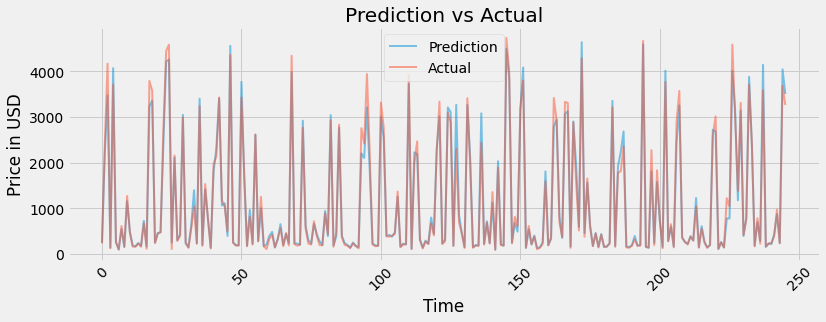

In [18]:
plt.figure(figsize=(12,4))
plt.plot(prediction, label='Prediction', lw=2, alpha=.5)
plt.plot(y_test, label='Actual', lw=2, alpha=.5)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [19]:
# Creation of a variable called x_projection and set it equal to the last 'projection' rows of data from the original dataset
x_projection = np.array(df[['Close']])[-projection:]
print(x_projection)

[[2636.093018]
 [2517.459961]
 [2245.43042 ]
 [2343.510986]
 [2362.600586]]


In [22]:
# Print the model predictions for the 'projection'
projection_prediction = model.predict(x_projection)
print(projection_prediction)

[2626.40553431 2508.9401068  2239.58797901 2336.70320058 2355.60491382]
